# K-Fold CV for Boosting Methods Using SKLearn 

In [20]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import random

In [2]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\hmche\anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.13.0-py39hcbf530~ --> anaconda::conda-4.13.0-py39haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge lightgbm

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::certifi-2021.10.8-py39haa95532_2, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::certifi-2021.10.8-py39haa95532_2, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0, defaults/win-64::ca-certificates-2022.3.29-haa95532_1
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29

In [4]:
import xgboost as xgb
from sklearn import metrics
from lightgbm import LGBMClassifier

import lightgbm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

C:\Users\hmche\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 300 #define 300 dpi for saving figures

import seaborn as sns
## here are some settings 
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':300}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats

### To load sklearn dataset
sklearn.datasets.load_breast_cancer(*, return_X_y=False, as_frame=False)[source]¶

Load and return the breast cancer wisconsin dataset (classification).

In [55]:
df = pd.read_csv('JORN17_dataset_v1.csv', na_values='?').dropna()  
df2 = pd.read_csv('SRER21_dataset_v1.csv', na_values='?').dropna() 
df3 = pd.concat(([df,df2]),ignore_index=True)
#df3 = pd.read_csv('JORN17_dataset_v1.csv', na_values='?').dropna() 
df3.isnull().sum()
df3.dropna(axis=0,inplace=True)
df= df.replace('woody',1)
df= df.replace('non-woody',0)
df2= df2.replace('woody',1)
df2= df2.replace('non-woody',0)
del df3['OID_']
del df3['Id']
del df3['gridcode']
del df3['Shape_Length']
del df3['Shape_Area']
df3= df3.replace('woody',1)
df3= df3.replace('non-woody',0)
df

,OID_,Id,gridcode,Shape_Length,Shape_Area,CH_mean,ARVI_mean,ARVI_med,ARVI_max,EVI_mean,EVI_med,EVI_max,NDVI_mean,NDVI_med,NDVI_max,SAVI_mean,SAVI_med,SAVI_max,Veg_class
0,2,2,2,16.0,4.79,0.010000,0.223962,0.226896,0.239161,0.273236,0.274394,0.307885,0.402131,0.406066,0.427636,0.278782,0.280285,0.316995,1
1,3,3,3,8.6,2.24,0.010000,0.287822,0.287822,0.316384,0.302193,0.302193,0.305906,0.448325,0.448325,0.469259,0.301407,0.301407,0.304224,1
2,4,4,4,27.8,11.12,0.012500,0.289236,0.313074,0.459671,0.300200,0.318621,0.374641,0.447470,0.466219,0.570786,0.298798,0.314429,0.358302,1
3,5,5,5,24.2,10.62,0.060000,0.330255,0.375986,0.498250,0.313174,0.335601,0.386369,0.477596,0.517136,0.598966,0.309534,0.325886,0.368766,1
4,6,6,6,17.4,6.10,0.012000,0.275800,0.341526,0.416294,0.264112,0.280268,0.314841,0.431575,0.487791,0.518614,0.266352,0.273629,0.312146,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,2698,2698,2698,16.0,3.12,0.005000,0.085548,0.085548,0.098842,0.207851,0.207851,0.216101,0.296033,0.296033,0.306464,0.222759,0.222759,0.230124,1
2697,2699,2699,2699,12.0,3.45,0.020000,0.061574,0.056132,0.076203,0.196788,0.198325,0.200353,0.276355,0.274378,0.285173,0.212724,0.214114,0.215713,0
2698,2700,2700,2700,14.0,4.95,0.011429,0.195101,0.181629,0.466077,0.263570,0.256796,0.378514,0.374646,0.365065,0.561462,0.267252,0.261795,0.353228,1
2699,2701,2701,2701,24.4,8.00,0.012857,0.153912,0.123123,0.369357,0.236553,0.228040,0.354934,0.336482,0.324982,0.496476,0.240477,0.235988,0.336204,0


# Extreme Gradient Boosting

1.5.0


C:\Users\hmche\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


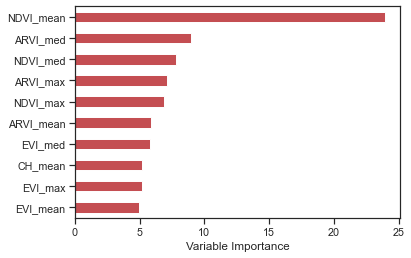

roc_auc_score 0.5238238453276047


C:\Users\hmche\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


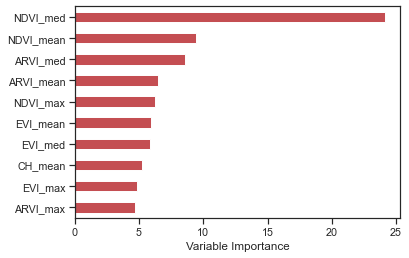

roc_auc_score 0.5420915460863621


C:\Users\hmche\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


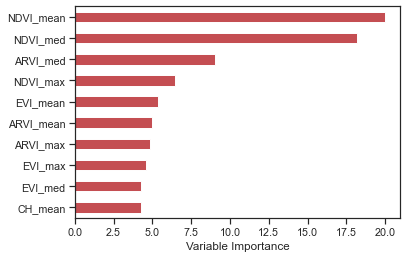

roc_auc_score 0.51875400498398


C:\Users\hmche\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


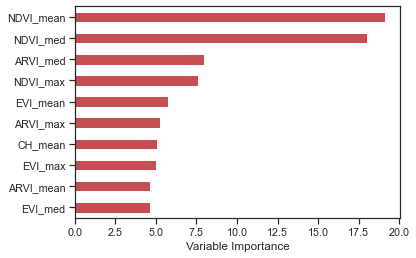

roc_auc_score 0.5059251336898395


C:\Users\hmche\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


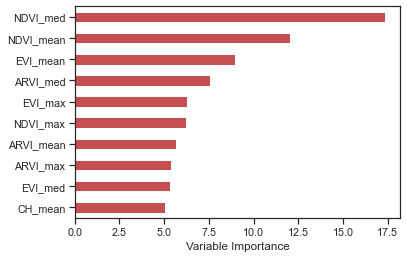

roc_auc_score 0.4196141709695926
---Run time is 4.170572900002298 seconds ---

Accuracy of each fold: 
 [0.4867924528301887, 0.47358490566037736, 0.49433962264150944, 0.5320754716981132, 0.4045368620037807]

Avg accuracy : 
0.47826586296679385

Std of accuracy : 
0.04167593891181152

Accuracy of each fold: 
 [0.4867924528301887, 0.47358490566037736, 0.49433962264150944, 0.5320754716981132, 0.4045368620037807]
Avg accuracy: 0.47826586296679385
Std of accuracy : 
0.04167593891181152

[[366 987]
 [395 901]]

              precision    recall  f1-score   support

           0       0.48      0.27      0.35      1353
           1       0.48      0.70      0.57      1296

    accuracy                           0.48      2649
   macro avg       0.48      0.48      0.46      2649
weighted avg       0.48      0.48      0.45      2649

sens  0.270509977827051
spec  0.6952160493827161
prec  0.480946123521682
f1_score  0.34626300851466413


NameError: name 'statallfeatures_dic' is not defined

In [60]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

# check xgboost version

import xgboost
import xgboost as xgb
from xgboost import XGBClassifier
print(xgboost.__version__)
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
random.seed(1000)
#Implementing cross validation 
kf = KFold(n_splits=5, random_state=1, shuffle=True)
#random_state = sets the seed
#shuffle = randomization
# Create the Extreme GBM
model = XGBClassifier(n_estimators=100, learning_rate = 0.1,use_label_encoder =False,verbose=None,
                max_depth = 5, eval_metric='logloss')
    
from time import time
import timeit #imports timeit module
start_time = timeit.default_timer() #defines start time so computational time can be calculated

acc_score = [];
Truth = [];
Output = [];

for train_index, test_index in kf.split(df):
    X_train , X_test = df.iloc[train_index,5:18], df2.iloc[test_index,5:18]
    Y_train , Y_test = df.iloc[train_index,-1], df2.iloc[test_index,-1]
    model.fit(X_train, Y_train)
    pred_values = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)
    Truth.extend(Y_test.values.reshape(Y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list 

        #print(model.feature_importances_)
    Importance = pd.DataFrame({'Importance':(model.feature_importances_*100)[0:10]}, index = (X_train.columns)[0:10])
    Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
    plt.xlabel('Variable Importance')
    plt.gca().legend_ = None
    plt.show()
        #plt.savefig('plot1.png')

        ##################################################
        #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
        #Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    print("roc_auc_score", roc_auc_score(Y_test, pred_prob))

elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))

#from here

print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print("sens ",sensitivity)
print("spec ", specificity)
print("prec ", precision)
print("f1_score ", f1_score)

statallfeatures_dic['Accuracy'].append(np.mean(acc_score))
statallfeatures_dic['Standard Error'].append(np.std(acc_score))
statallfeatures_dic['Sensitivity'].append(sensitivity)
statallfeatures_dic['Specificity'].append(specificity)
statallfeatures_dic['Precision'].append(precision)
statallfeatures_dic['F1_Score'].append(f1_score)

indaccs_dic['XGBoosting']=acc_score

# Reference: 

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

max_depth (int, optional (default=-1)) – Maximum tree depth for base learners, <=0 means no limit.

learning_rate (float, optional (default=0.1)) – Boosting learning rate. You can use callbacks parameter of fit method to shrink/adapt learning rate in training using reset_parameter callback. Note, that this will ignore the learning_rate argument in training.

n_estimators (int, optional (default=100)) – Number of boosted trees to fit.

eval_metric (str, callable, list or None, optional (default=None)) – If str, it should be a built-in evaluation metric to use. If callable, it should be a custom evaluation metric, see note below for more details. If list, it can be a list of built-in metrics, a list of custom evaluation metrics, or a mix of both. In either case, the metric from the model parameters will be evaluated and used as well. 
Default: ‘l2’ for LGBMRegressor, **‘logloss’ for LGBMClassifier**, ‘ndcg’ for LGBMRanker.


[1]	training's binary_logloss: 0.540495	valid_0's binary_logloss: 0.854652
[2]	training's binary_logloss: 0.519966	valid_0's binary_logloss: 0.840471
[3]	training's binary_logloss: 0.501276	valid_0's binary_logloss: 0.834727
[4]	training's binary_logloss: 0.485532	valid_0's binary_logloss: 0.818191
[5]	training's binary_logloss: 0.471547	valid_0's binary_logloss: 0.815061
[6]	training's binary_logloss: 0.459143	valid_0's binary_logloss: 0.804768
[7]	training's binary_logloss: 0.448727	valid_0's binary_logloss: 0.804999
[8]	training's binary_logloss: 0.438733	valid_0's binary_logloss: 0.79957
[9]	training's binary_logloss: 0.42924	valid_0's binary_logloss: 0.796298
[10]	training's binary_logloss: 0.420549	valid_0's binary_logloss: 0.792862
[11]	training's binary_logloss: 0.412399	valid_0's binary_logloss: 0.781109
[12]	training's binary_logloss: 0.405297	valid_0's binary_logloss: 0.781215
[13]	training's binary_logloss: 0.398536	valid_0's binary_logloss: 0.782383
[14]	training's binary_

NameError: name 'statallfeatures_dic' is not defined

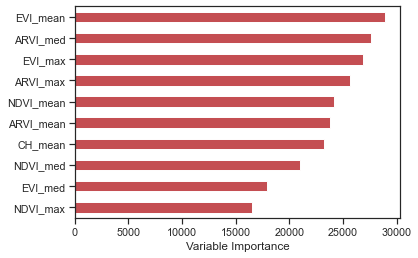

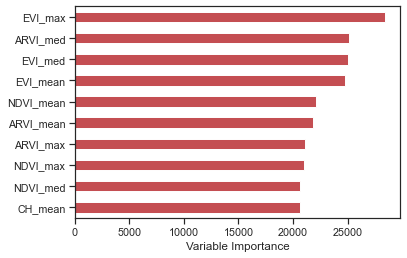

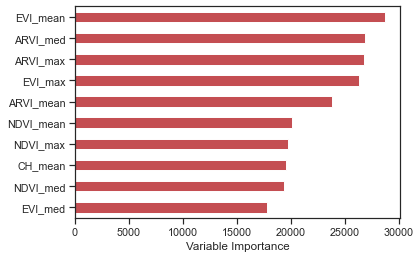

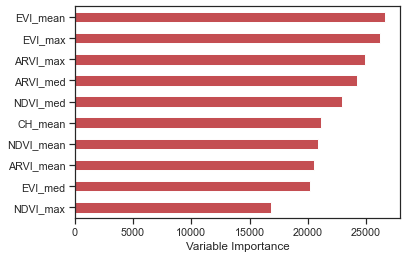

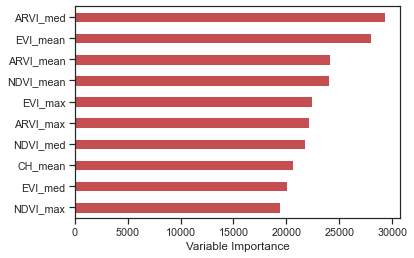

In [61]:
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
import lightgbm
random.seed(1000)
#Implementing cross validation 
kf = KFold(n_splits=5, random_state=1, shuffle=True)
model = lightgbm.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)

from time import time
import timeit #imports timeit module
start_time = timeit.default_timer() #defines start time so computational time can be calculated

acc_score = [];
Truth = [];
Output = [];
 
for train_index , test_index in kf.split(df):
    
    X_train , X_test = df.iloc[train_index,5:18], df2.iloc[test_index,5:18]
    Y_train , Y_test = df.iloc[train_index,-1], df2.iloc[test_index,-1]
    
    # Create the LightGBM data containers
    model.fit(X_train,Y_train,eval_set=[(X_test,Y_test),(X_train,Y_train)],
          eval_metric='logloss')

    pred_values = model.predict(X_test)
     
    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(Y_test.values.reshape(Y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list  
    
    #print(model.feature_importances_)
    Importance = pd.DataFrame({'Importance':(model.feature_importances_*100)[0:10]}, 
                          index = (X_train.columns)[0:10])
    Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r')
    plt.xlabel('Variable Importance')
    plt.gca().legend_ = None
    #plt.savefig('plot1.png')


elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
#start here

print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print("sens ",sensitivity)
print("spec ", specificity)
print("prec ", precision)
print("f1_score ", f1_score)

statallfeatures_dic['Accuracy'].append(np.mean(acc_score))
statallfeatures_dic['Standard Error'].append(np.std(acc_score))
statallfeatures_dic['Sensitivity'].append(sensitivity)
statallfeatures_dic['Specificity'].append(specificity)
statallfeatures_dic['Precision'].append(precision)
statallfeatures_dic['F1_Score'].append(f1_score)

indaccs_dic['LogReg']=acc_score

In [ ]:
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output))

# CatBoosting

In [ ]:
conda install -c conda-forge catboost

In [35]:
# https://catboost.ai/en/docs/concepts/python-quickstart
import catboost as cb
from catboost import CatBoostClassifier


print ('catboost version', cb.__version__)

catboost version 1.0.6


---Run time is 2.3217304999998305 seconds ---

Accuracy of each fold: 
 [0.5377358490566038, 0.5584905660377358, 0.5358490566037736, 0.5452830188679245, 0.5500945179584121]

Avg accuracy : 
0.5454906017048899

Std of accuracy : 
0.008286540758746996

Accuracy of each fold: 
 [0.5377358490566038, 0.5584905660377358, 0.5358490566037736, 0.5452830188679245, 0.5500945179584121]
Avg accuracy: 0.5454906017048899
Std of accuracy : 
0.008286540758746996

[[472 881]
 [323 973]]

              precision    recall  f1-score   support

           0       0.59      0.35      0.44      1353
           1       0.52      0.75      0.62      1296

    accuracy                           0.55      2649
   macro avg       0.56      0.55      0.53      2649
weighted avg       0.56      0.55      0.53      2649

sens  0.34885439763488546
spec  0.7507716049382716
prec  0.5937106918238994
f1_score  0.4394785847299814


NameError: name 'statallfeatures_dic' is not defined

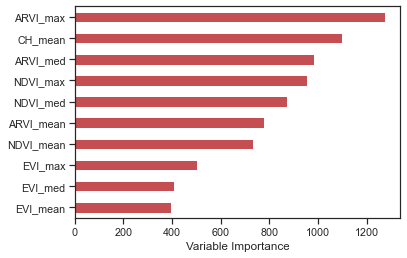

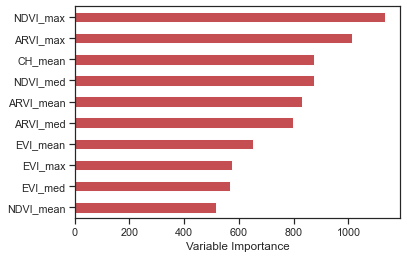

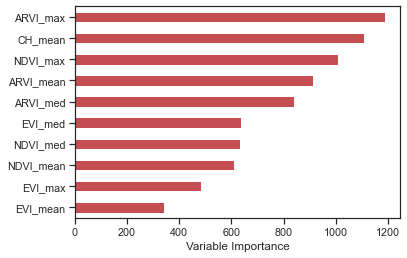

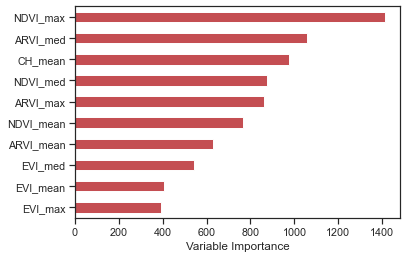

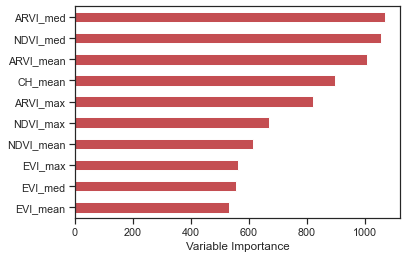

In [62]:
#Implementing cross validation 
random.seed(1000)
kf = KFold(n_splits=5, random_state=1, shuffle=True)

from time import time
import timeit #imports timeit module
start_time = timeit.default_timer() #defines start time so computational time can be calculated

acc_score = [];
Truth = [];
Output = [];
 
for train_index , test_index in kf.split(df):
    
    X_train , X_test = df.iloc[train_index,5:18], df2.iloc[test_index,5:18]
    y_train , y_test = df.iloc[train_index,-1], df2.iloc[test_index,-1]
    
    # Create CatBoost model
    model = CatBoostClassifier(iterations=100,
                           depth=4,
                           learning_rate=0.1,
                           loss_function='Logloss')
    # train the model
    model.fit(X_train, y_train, verbose=False)
    
    # make the prediction using the resulting model
    pred_values = model.predict(X_test)
    #preds_proba = model.predict_proba(test_data)
    #print("class = ", preds_class)
    #print("proba = ", preds_proba)
     
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list  
    
    #print(model.feature_importances_)
    Importance = pd.DataFrame({'Importance':(model.feature_importances_*100)[0:10]}, 
                          index = (X_train.columns)[0:10])
    Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r')
    plt.xlabel('Variable Importance')
    plt.gca().legend_ = None
    #plt.savefig('plot1.png')


elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))

#start here

print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print("sens ",sensitivity)
print("spec ", specificity)
print("prec ", precision)
print("f1_score ", f1_score)

statallfeatures_dic['Accuracy'].append(np.mean(acc_score))
statallfeatures_dic['Standard Error'].append(np.std(acc_score))
statallfeatures_dic['Sensitivity'].append(sensitivity)
statallfeatures_dic['Specificity'].append(specificity)
statallfeatures_dic['Precision'].append(precision)
statallfeatures_dic['F1_Score'].append(f1_score)

indaccs_dic['LogReg']=acc_score

In [ ]:
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output))

# Please neglect: The following are some codes to be developed

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.Dataset.html